In [18]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
import pygwalker as pyg


In [19]:
df = pd.read_csv("Amblopia_Data.csv")
df

,sr #,Age,Amblyopic eye,Vision at presentation,After 1 week,After 2 weeks,After 3 weeks,After 4 weeks,After 6 weeks,After 8 weeks,After 12 weeks,After 16 weeks,After 20 weeks,After 24 weeks,After 28 weeks,After 32 Weeks,Poor compliance case,Squint,Holding Vision,Refrective error
0,1,6.0,right,6\36,6\24,6\18,6\12,6\9,6\6,6\6,6\6,6\6,6\6,6\6,6\6,6\6,no,ET,6 months,-3.75
1,2,6.0,right,6\24,6\18,6\12,6\9,6\6,6\6,6\6,6\6,6\6,6\6,6\6,6\6,6\6,no,ET,6 months,-3.00
2,3,5.0,Left,CF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,yes,No,NaN,NaN
3,4,10.0,right,6\36,6\24,6\18,6\12,6\9,6\9,6\6,6\6,6\6,6\6,6\6,6\6,6\6,no,no,12 months,4.00
4,5,9.0,left,6\12,6\9,6\6,6\6,6\6,6\6,6\6,6\6,6\6,6\6,6\6,6\6,6\6,no,ET,12 months,4.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,98,15.0,Left,CF,6\60,6\60,6\36,6\24,6\18,6\18,6\12,6\12,6\9,6\6,6\6,6\6,no,No,2 months,-1.00
98,99,22.0,right,6\24,6\24,6\18,6\18,6\12,6\12,6\12,NaN,NaN,NaN,NaN,NaN,NaN,no,XT,NaN,2.50
99,100,5.0,Left,6\60,6\36,6\36,6\24,6\6,6\6,6\6,6\6,6\6,6\6,6\6,6\6,6\6,yes,ET,2 months,5.50
100,101,13.0,Left,6\24,6\24,6\24,6\24,6\18,6\12,6\9,6\9,6\6,6\6,6\6,6\6,6\6,no,ET,2 months,-1.00


In [20]:
df.isnull().sum()

sr #                       0
Age                        0
Amblyopic eye              0
Vision at presentation     0
After 1 week               3
After 2 weeks              3
After 3 weeks              3
After 4 weeks              3
After 6 weeks              3
After 8 weeks              3
After 12 weeks             4
After 16 weeks             6
After 20 weeks             8
After 24 weeks             9
After 28 weeks             9
After 32 Weeks             9
Poor compliance case       4
Squint                     1
Holding Vision            12
Refrective error           4
dtype: int64

In [21]:
df.shape

(102, 20)

In [22]:
unique_data = {}

for column in df.columns[3:16]:
    unique_data[column] = df[column].unique()

In [23]:
def frac_to_dec1(fraction_str):
    try:
        numerator, denominator = map(int, fraction_str.split('\\'))
        result = numerator / denominator
        return round(result,2)
    except ValueError:
        return None  # or any other default value you prefer

def frac_to_dec(row, col):
    if row[col] == 'CF':
        return 0
    elif row[col] in unique_data[col]:
        return frac_to_dec1(row[col])
    else:
        return 0

title_list= list(df.columns.values)

for x in title_list[2:16]:
    if x in unique_data: 
        # Apply the conversion function to each row in the DataFrame
        df[x] = df.apply(lambda row: frac_to_dec(row, x), axis=1)
        
df


,sr #,Age,Amblyopic eye,Vision at presentation,After 1 week,After 2 weeks,After 3 weeks,After 4 weeks,After 6 weeks,After 8 weeks,After 12 weeks,After 16 weeks,After 20 weeks,After 24 weeks,After 28 weeks,After 32 Weeks,Poor compliance case,Squint,Holding Vision,Refrective error
0,1,6.0,right,0.17,0.25,0.33,0.50,0.67,1.00,1.00,1.00,1.0,1.00,1.0,1.0,1.0,no,ET,6 months,-3.75
1,2,6.0,right,0.25,0.33,0.50,0.67,1.00,1.00,1.00,1.00,1.0,1.00,1.0,1.0,1.0,no,ET,6 months,-3.00
2,3,5.0,Left,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.0,yes,No,NaN,NaN
3,4,10.0,right,0.17,0.25,0.33,0.50,0.67,0.67,1.00,1.00,1.0,1.00,1.0,1.0,1.0,no,no,12 months,4.00
4,5,9.0,left,0.50,0.67,1.00,1.00,1.00,1.00,1.00,1.00,1.0,1.00,1.0,1.0,1.0,no,ET,12 months,4.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,98,15.0,Left,0.00,0.10,0.10,0.17,0.25,0.33,0.33,0.50,0.5,0.67,1.0,1.0,1.0,no,No,2 months,-1.00
98,99,22.0,right,0.25,0.25,0.33,0.33,0.50,0.50,0.50,0.00,0.0,0.00,0.0,0.0,0.0,no,XT,NaN,2.50
99,100,5.0,Left,0.10,0.17,0.17,0.25,1.00,1.00,1.00,1.00,1.0,1.00,1.0,1.0,1.0,yes,ET,2 months,5.50
100,101,13.0,Left,0.25,0.25,0.25,0.25,0.33,0.50,0.67,0.67,1.0,1.00,1.0,1.0,1.0,no,ET,2 months,-1.00


In [24]:
df[['Squint', 'Holding Vision', 'Poor compliance case']] = df[['Squint', 'Holding Vision', 'Poor compliance case']].ffill()
df.loc[:, 'Refrective error'] = df[['Refrective error']].fillna(df[['Refrective error']].mean().round(2)).infer_objects(copy=False)


In [25]:
df


,sr #,Age,Amblyopic eye,Vision at presentation,After 1 week,After 2 weeks,After 3 weeks,After 4 weeks,After 6 weeks,After 8 weeks,After 12 weeks,After 16 weeks,After 20 weeks,After 24 weeks,After 28 weeks,After 32 Weeks,Poor compliance case,Squint,Holding Vision,Refrective error
0,1,6.0,right,0.17,0.25,0.33,0.50,0.67,1.00,1.00,1.00,1.0,1.00,1.0,1.0,1.0,no,ET,6 months,-3.75
1,2,6.0,right,0.25,0.33,0.50,0.67,1.00,1.00,1.00,1.00,1.0,1.00,1.0,1.0,1.0,no,ET,6 months,-3.00
2,3,5.0,Left,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.0,yes,No,6 months,1.18
3,4,10.0,right,0.17,0.25,0.33,0.50,0.67,0.67,1.00,1.00,1.0,1.00,1.0,1.0,1.0,no,no,12 months,4.00
4,5,9.0,left,0.50,0.67,1.00,1.00,1.00,1.00,1.00,1.00,1.0,1.00,1.0,1.0,1.0,no,ET,12 months,4.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,98,15.0,Left,0.00,0.10,0.10,0.17,0.25,0.33,0.33,0.50,0.5,0.67,1.0,1.0,1.0,no,No,2 months,-1.00
98,99,22.0,right,0.25,0.25,0.33,0.33,0.50,0.50,0.50,0.00,0.0,0.00,0.0,0.0,0.0,no,XT,2 months,2.50
99,100,5.0,Left,0.10,0.17,0.17,0.25,1.00,1.00,1.00,1.00,1.0,1.00,1.0,1.0,1.0,yes,ET,2 months,5.50
100,101,13.0,Left,0.25,0.25,0.25,0.25,0.33,0.50,0.67,0.67,1.0,1.00,1.0,1.0,1.0,no,ET,2 months,-1.00


In [26]:
df.isnull().sum()

sr #                      0
Age                       0
Amblyopic eye             0
Vision at presentation    0
After 1 week              0
After 2 weeks             0
After 3 weeks             0
After 4 weeks             0
After 6 weeks             0
After 8 weeks             0
After 12 weeks            0
After 16 weeks            0
After 20 weeks            0
After 24 weeks            0
After 28 weeks            0
After 32 Weeks            0
Poor compliance case      0
Squint                    0
Holding Vision            0
Refrective error          0
dtype: int64

In [27]:
# DATA FORMATTING DONE AND MANAGED THE CASES FOR THE PROPER LABELING.

df['Amblyopic eye'] = df['Amblyopic eye'].apply(lambda x: str(x).lower())
df['Squint'] = df['Squint'].apply(lambda x: str(x).upper())
df['Poor compliance case'] = df['Poor compliance case'].replace('nan', 'no')

counts = df['Amblyopic eye'].value_counts()


In [28]:
df['Holding Vision'] = df['Holding Vision'].str.extract(r'(\d+)').astype(int)


new_column_names = {
    'Holding Vision': 'Holding Vision (Months)',
    'Refrective error': 'Refractive Error'
}
df.rename(columns=new_column_names, inplace=True)

In [29]:
df.to_csv("ambloypia_cleaned_data.csv", index = False)


In [30]:
df

,sr #,Age,Amblyopic eye,Vision at presentation,After 1 week,After 2 weeks,After 3 weeks,After 4 weeks,After 6 weeks,After 8 weeks,After 12 weeks,After 16 weeks,After 20 weeks,After 24 weeks,After 28 weeks,After 32 Weeks,Poor compliance case,Squint,Holding Vision (Months),Refractive Error
0,1,6.0,right,0.17,0.25,0.33,0.50,0.67,1.00,1.00,1.00,1.0,1.00,1.0,1.0,1.0,no,ET,6,-3.75
1,2,6.0,right,0.25,0.33,0.50,0.67,1.00,1.00,1.00,1.00,1.0,1.00,1.0,1.0,1.0,no,ET,6,-3.00
2,3,5.0,left,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.0,yes,NO,6,1.18
3,4,10.0,right,0.17,0.25,0.33,0.50,0.67,0.67,1.00,1.00,1.0,1.00,1.0,1.0,1.0,no,NO,12,4.00
4,5,9.0,left,0.50,0.67,1.00,1.00,1.00,1.00,1.00,1.00,1.0,1.00,1.0,1.0,1.0,no,ET,12,4.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,98,15.0,left,0.00,0.10,0.10,0.17,0.25,0.33,0.33,0.50,0.5,0.67,1.0,1.0,1.0,no,NO,2,-1.00
98,99,22.0,right,0.25,0.25,0.33,0.33,0.50,0.50,0.50,0.00,0.0,0.00,0.0,0.0,0.0,no,XT,2,2.50
99,100,5.0,left,0.10,0.17,0.17,0.25,1.00,1.00,1.00,1.00,1.0,1.00,1.0,1.0,1.0,yes,ET,2,5.50
100,101,13.0,left,0.25,0.25,0.25,0.25,0.33,0.50,0.67,0.67,1.0,1.00,1.0,1.0,1.0,no,ET,2,-1.00


In [31]:
# DATA VISUALIZATION

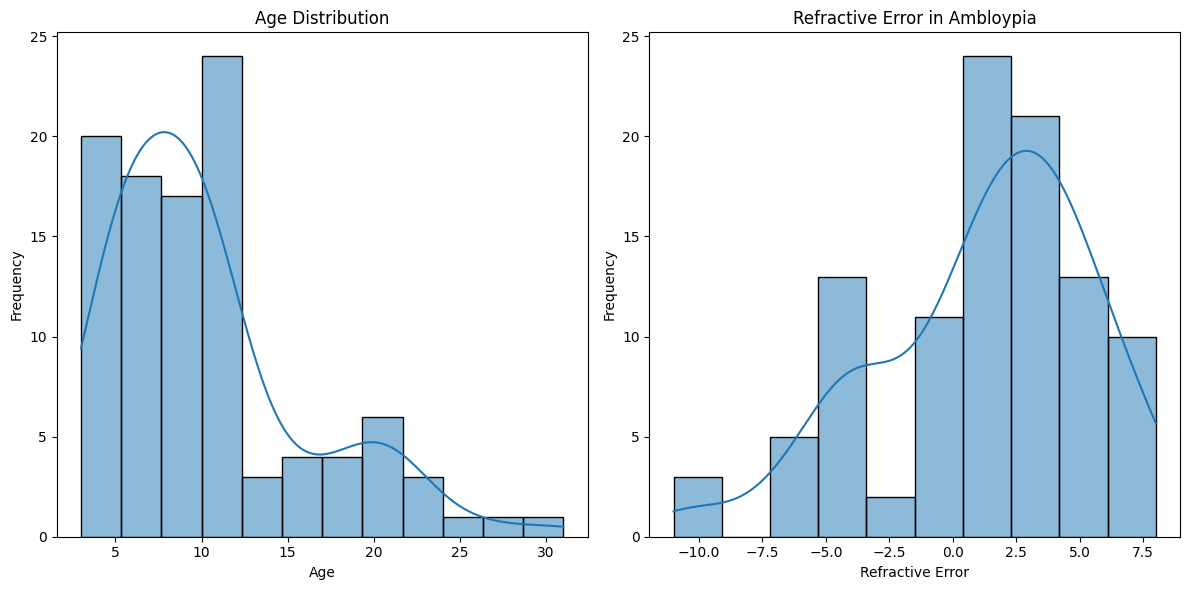

In [32]:
fig,axs = plt.subplots(1,2, figsize = (12,6))

sns.histplot(df["Age"], kde = True, ax = axs[0])
axs[0].set_title("Age Distribution")
axs[0].set_xlabel("Age")
axs[0].set_ylabel("Frequency")

sns.histplot(df["Refractive Error"], bins = 10, kde = True, ax = axs[1])
axs[1].set_title("Refractive Error in Ambloypia")
axs[1].set_xlabel("Refractive Error")
axs[1].set_ylabel("Frequency")

plt.tight_layout()
plt.show()


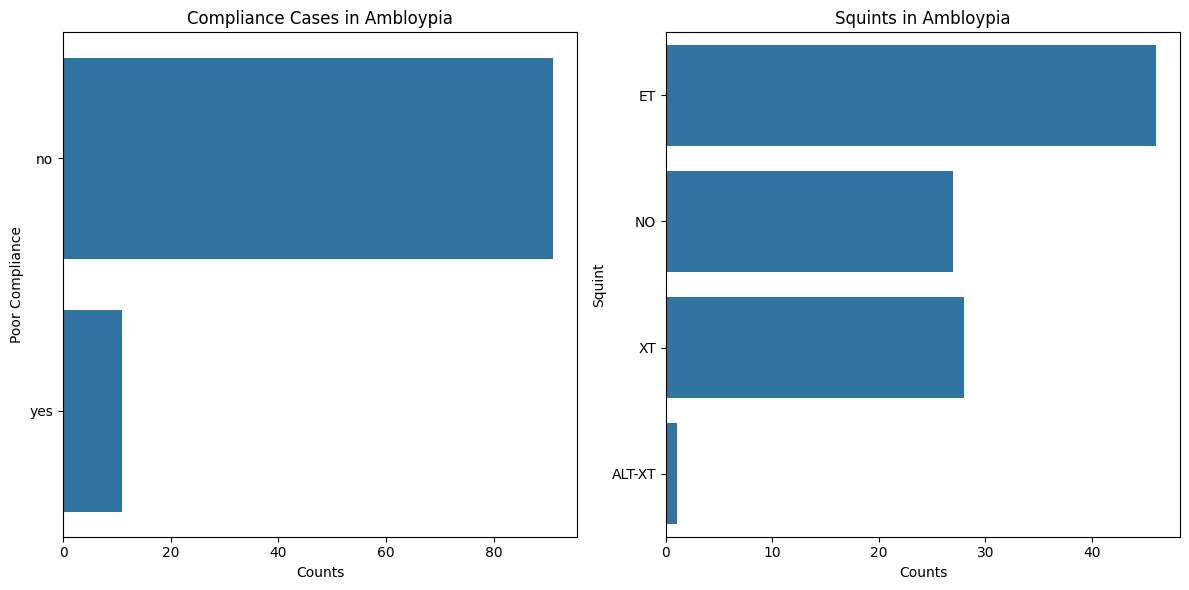

In [80]:
fig,axs = plt.subplots(1,2, figsize = (12,6))

sns.countplot(df['Poor compliance case'], ax = axs[0])
axs[0].set_title("Compliance Cases in Ambloypia")
axs[0].set_xlabel("Counts")
axs[0].set_ylabel("Poor Compliance")

sns.countplot(df["Squint"], ax = axs[1])
axs[1].set_title("Squints in Ambloypia")
axs[1].set_xlabel("Counts")
axs[1].set_ylabel("Squint")

plt.tight_layout()
plt.show()

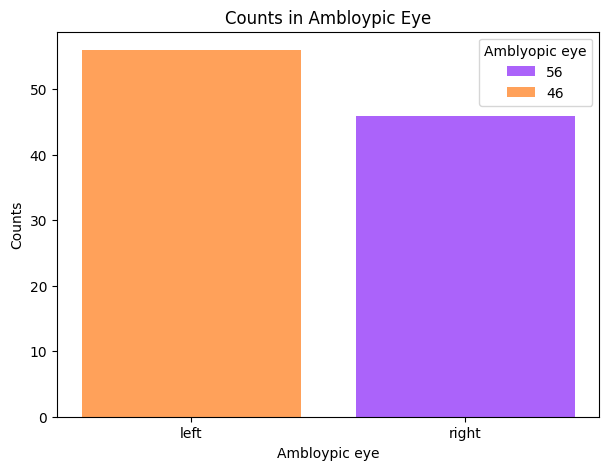

In [84]:
counts={}
counts = df["Amblyopic eye"].value_counts()

plt.figure(figsize=(7,5))
plt.bar(counts.index, counts.values, color ={'#ab63fa', '#ffa15a'})
plt.title("Counts in Ambloypic Eye")
plt.xlabel("Ambloypic eye")
plt.ylabel("Counts")

for i, value in enumerate(counts.values):
    plt.bar(0, 0, color=['#ab63fa', '#ffa15a'][i], label=value)

plt.legend(title="Amblyopic eye")
plt.show()

